In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score   
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import classification_report as cls_report
from sklearn.metrics import f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM

In [69]:
train_df=pd.read_csv('/Users/davislab/Downloads/train_255.csv')
test_df=pd.read_csv('/Users/davislab/Downloads/test_255.csv')

In [70]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [71]:
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [72]:
train_df.isnull().values.any(), test_df.isnull().values.any()

(False, False)

In [73]:
train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


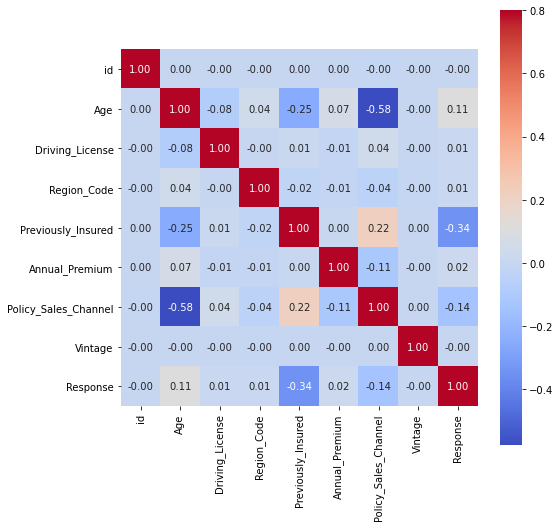

In [74]:
matrix = train_df.corr(method='pearson')
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(matrix, vmax=.8, square=True,annot=True, fmt= '.2f', cbar=True, annot_kws={'size': 10}, cmap="coolwarm");

<AxesSubplot:xlabel='Response', ylabel='count'>

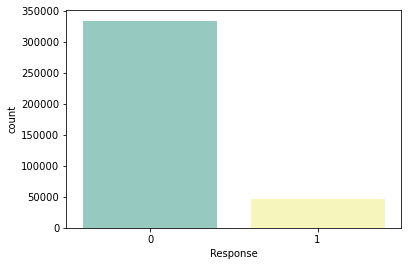

In [75]:
sns.countplot(x=train_df['Response'],palette="Set3")

<AxesSubplot:xlabel='Gender', ylabel='count'>

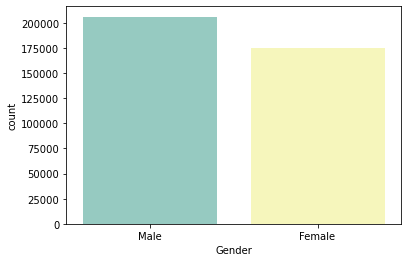

In [76]:
sns.countplot(x=train_df['Gender'],palette="Set3")

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

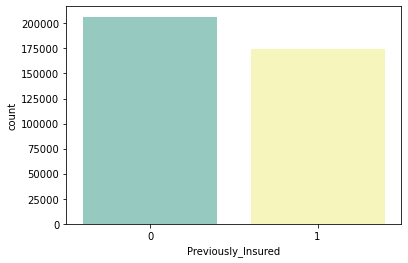

In [77]:
sns.countplot(x=train_df['Previously_Insured'],palette="Set3")

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

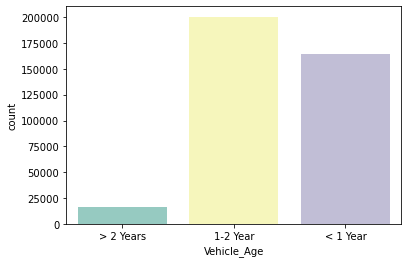

In [78]:
sns.countplot(x=train_df['Vehicle_Age'],palette="Set3")

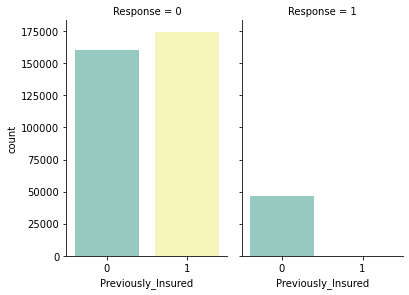

In [79]:
g = sns.catplot(x="Previously_Insured", col="Response",
                data=train_df, kind="count",
                height=4, aspect=.7,palette="Set3");

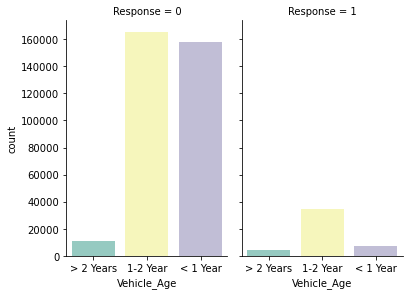

In [80]:
g = sns.catplot(x="Vehicle_Age", col="Response",
                data=train_df, kind="count",
                height=4, aspect=.7,palette="Set3");

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

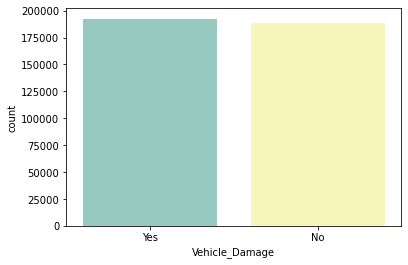

In [81]:
sns.countplot(x=train_df['Vehicle_Damage'],palette="Set3")

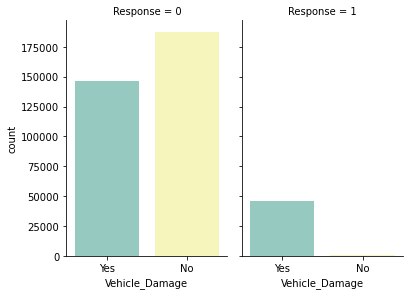

In [82]:
g = sns.catplot(x="Vehicle_Damage", col="Response",
                data=train_df, kind="count",
                height=4, aspect=.7,palette="Set3");

In [83]:
gender_coder = {'Male':1, 'Female':0} ## one hot encoding of the nominal diagnosis values
train_df.Gender = train_df.Gender.map(gender_coder)
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [84]:
train_df = pd.get_dummies(train_df, columns=['Vehicle_Age'])

In [85]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,1,44,1,28.0,0,Yes,40454.0,26.0,217,1,0,0,1
1,2,1,76,1,3.0,0,No,33536.0,26.0,183,0,1,0,0
2,3,1,47,1,28.0,0,Yes,38294.0,26.0,27,1,0,0,1
3,4,1,21,1,11.0,1,No,28619.0,152.0,203,0,0,1,0
4,5,0,29,1,41.0,1,No,27496.0,152.0,39,0,0,1,0


In [87]:
vehicle_coder = {'Yes':1, 'No':0} ## one hot encoding of the nominal diagnosis values
train_df.Vehicle_Damage = train_df.Vehicle_Damage.map(vehicle_coder)
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1
1,2,1,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0
2,3,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1
3,4,1,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0
4,5,0,29,1,41.0,1,0,27496.0,152.0,39,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,30170.0,26.0,88,0,1,0,0
381105,381106,1,30,1,37.0,1,0,40016.0,152.0,131,0,0,1,0
381106,381107,1,21,1,30.0,1,0,35118.0,160.0,161,0,0,1,0
381107,381108,0,68,1,14.0,0,1,44617.0,124.0,74,0,0,0,1


In [89]:
train_df=train_df.drop(['id'],axis=1)
train_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1
1,1,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0
2,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1
3,1,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0
4,0,29,1,41.0,1,0,27496.0,152.0,39,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,0,30170.0,26.0,88,0,1,0,0
381105,1,30,1,37.0,1,0,40016.0,152.0,131,0,0,1,0
381106,1,21,1,30.0,1,0,35118.0,160.0,161,0,0,1,0
381107,0,68,1,14.0,0,1,44617.0,124.0,74,0,0,0,1


In [90]:
min_max = MinMaxScaler()
train_df[['Annual_Premium']] = min_max.fit_transform(train_df[['Annual_Premium']])
train_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,1,0.070366,26.0,217,1,0,0,1
1,1,76,1,3.0,0,0,0.057496,26.0,183,0,1,0,0
2,1,47,1,28.0,0,1,0.066347,26.0,27,1,0,0,1
3,1,21,1,11.0,1,0,0.048348,152.0,203,0,0,1,0
4,0,29,1,41.0,1,0,0.046259,152.0,39,0,0,1,0


In [91]:
train_df.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [92]:
X_train=train_df.loc[:, train_df.columns != 'Response']
y_train=train_df['Response']
X_train.shape, y_train.shape

((381109, 12), (381109,))

In [93]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)

In [94]:
X.shape,y.shape

((668798, 12), (668798,))

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics as metrics
from sklearn.metrics import auc

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=43)

In [97]:
gboost_clf = GradientBoostingClassifier()

In [98]:
gboost_clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [101]:
def plot_ROC(fpr, tpr, m_name):
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    lw = 2
    plt.plot(fpr, tpr, color='blue',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)    
    plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', alpha=0.5)    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('Receiver operating characteristic for %s'%m_name, fontsize=20)
    plt.legend(loc="lower right", fontsize=16)
    plt.show()

              precision    recall  f1-score   support

           0       0.89      0.75      0.81     66890
           1       0.78      0.91      0.84     66870

    accuracy                           0.83    133760
   macro avg       0.84      0.83      0.83    133760
weighted avg       0.84      0.83      0.83    133760



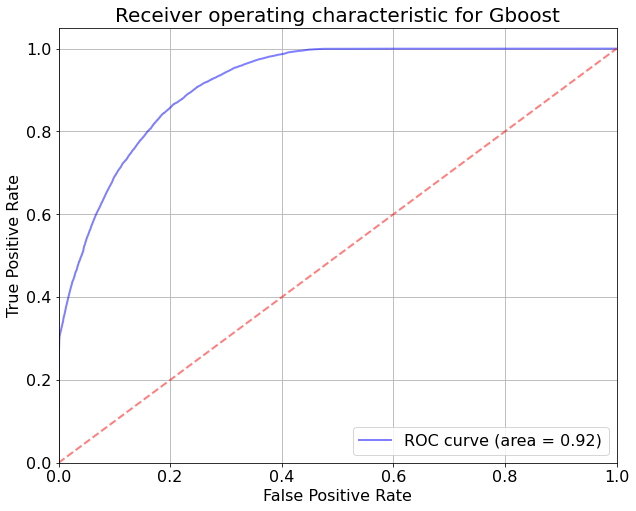

In [112]:
Gboost_preds = gboost_clf.predict_proba(X_test)
Gboost_class = gboost_clf.predict(X_test)
print(classification_report(y_test, Gboost_class))
Gboost_score = roc_auc_score(y_test, Gboost_preds[:,1], average = 'weighted')
(fpr, tpr, thresholds) = roc_curve(y_test, Gboost_preds[:,1])
plot_ROC(fpr, tpr, 'Gboost')

In [103]:
test_df = pd.get_dummies(test_df, columns=['Vehicle_Age'])

In [105]:
test_df.Gender = test_df.Gender.map(gender_coder)
test_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,381110,1,25,1,11.0,1,No,35786.0,152.0,53,0,1,0
1,381111,1,40,1,28.0,0,Yes,33762.0,7.0,111,1,0,0
2,381112,1,47,1,28.0,0,Yes,40050.0,124.0,199,1,0,0
3,381113,1,24,1,27.0,1,Yes,37356.0,152.0,187,0,1,0
4,381114,1,27,1,28.0,1,No,59097.0,152.0,297,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,0,26,1,37.0,1,No,30867.0,152.0,56,0,1,0
127033,508143,0,38,1,28.0,0,Yes,28700.0,122.0,165,1,0,0
127034,508144,1,21,1,46.0,1,No,29802.0,152.0,74,0,1,0
127035,508145,1,71,1,28.0,1,No,62875.0,26.0,265,1,0,0


In [106]:
test_df.Vehicle_Damage = test_df.Vehicle_Damage.map(vehicle_coder)
test_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,381110,1,25,1,11.0,1,0,35786.0,152.0,53,0,1,0
1,381111,1,40,1,28.0,0,1,33762.0,7.0,111,1,0,0
2,381112,1,47,1,28.0,0,1,40050.0,124.0,199,1,0,0
3,381113,1,24,1,27.0,1,1,37356.0,152.0,187,0,1,0
4,381114,1,27,1,28.0,1,0,59097.0,152.0,297,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,0,26,1,37.0,1,0,30867.0,152.0,56,0,1,0
127033,508143,0,38,1,28.0,0,1,28700.0,122.0,165,1,0,0
127034,508144,1,21,1,46.0,1,0,29802.0,152.0,74,0,1,0
127035,508145,1,71,1,28.0,1,0,62875.0,26.0,265,1,0,0


In [107]:
test_df[['Annual_Premium']] = min_max.fit_transform(test_df[['Annual_Premium']])
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,381110,1,25,1,11.0,1,0,0.070633,152.0,53,0,1,0
1,381111,1,40,1,28.0,0,1,0.066321,7.0,111,1,0,0
2,381112,1,47,1,28.0,0,1,0.079717,124.0,199,1,0,0
3,381113,1,24,1,27.0,1,1,0.073978,152.0,187,0,1,0
4,381114,1,27,1,28.0,1,0,0.120293,152.0,297,0,1,0


In [108]:
test_df=test_df.drop(['id'],axis=1)

In [109]:
pred = gboost_clf.predict(test_df)